In [1]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint

In [2]:
train=np.load('train_5class_1800.npy', allow_pickle=True, encoding='bytes')

In [3]:
val=np.load('val_5class_200.npy', allow_pickle=True, encoding='bytes')

In [4]:
test=np.load('test_5class_500.npy', allow_pickle=True, encoding='bytes')

In [6]:
type(train), type(val), type(test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [7]:
val

array([[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

In [8]:
np.random.shuffle(val)

In [9]:
val

array([[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

In [10]:
np.random.shuffle(train)

In [11]:
np.random.shuffle(test)

In [12]:
# preprocessing train data

n=len(train)
x_train = train[:, :-1]
y_train = train[:, -1]

g = []
for i in range(n):
    a=x_train[i][0]
    g.append(a)
g = np.array(g)

In [13]:
train_x=g

In [14]:
len(train_x)

1800

In [15]:
#preprocessing test data

m=len(test)
x_test = test[:, :-1]
y_test = test[:, -1]

h=[]
for i in range(m):
    b=x_test[i][0]
    h.append(b)
test_x = np.array(h)

In [16]:
len(test_x)

500

In [17]:
# preprocessing validation data

o=len(val)
x_val = val[:, :-1]
y_val = val[:, -1]

k=[]
for i in range(o):
    c=x_val[i][0]
    k.append(c)
val_x = np.array(k)

In [18]:
len(val_x)

200

In [23]:
import category_encoders as ce
enc = ce.OneHotEncoder(y_train, handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [24]:
y_train = enc.fit_transform(y_train)

In [25]:
y_test = enc.transform(y_test)

In [26]:
y_val = enc.transform(y_val)

In [27]:
y_train

,0_Alahaiya_bilaval,0_Bhup,0_Malkauns,0_Yaman_kalyan,0_Miyan_malhar
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1795,0.0,0.0,0.0,0.0,1.0
1796,0.0,1.0,0.0,0.0,0.0
1797,0.0,0.0,0.0,1.0,0.0
1798,0.0,0.0,1.0,0.0,0.0


In [28]:
y_test

,0_Alahaiya_bilaval,0_Bhup,0_Malkauns,0_Yaman_kalyan,0_Miyan_malhar
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
495,0.0,0.0,1.0,0.0,0.0
496,0.0,0.0,0.0,1.0,0.0
497,0.0,0.0,0.0,1.0,0.0
498,0.0,1.0,0.0,0.0,0.0


In [29]:
train_x.shape

(1800, 432, 504, 3)

In [36]:
cnn = Sequential()

cnn.add(Conv2D(50, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu', input_shape=(432, 504, 3)))

cnn.add(Conv2D(75, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(105, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(150, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(190, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(240, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(300, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(330, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(GlobalAveragePooling2D())
# cnn.add(Flatten())

cnn.add(Dense(150, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(80, activation='relu'))
cnn.add(Dropout(0.3))


cnn.add(Dense(5, activation='softmax'))

In [37]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 144, 168, 50)      1400      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 56, 75)        33825     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 28, 75)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 28, 75)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 10, 105)        70980     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 5, 105)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 5, 105)        

In [38]:
cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [39]:
filepath = "saved-model-{epoch:02d}-{val_loss:.2f}.hdf5"

In [40]:
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')

In [35]:
# cnn.fit(train_x, y_train, batch_size=8, epochs=30, validation_data=(val_x, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 1.6155 - accuracy: 0.1950
Epoch 00001: saving model to saved-model-01-1.61.hdf5
225/225 [==============================] - 149s 664ms/step - loss: 1.6155 - accuracy: 0.1950 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 1.6115 - accuracy: 0.1922
Epoch 00002: saving model to saved-model-02-1.61.hdf5
225/225 [==============================] - 109s 483ms/step - loss: 1.6115 - accuracy: 0.1922 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 1.6116 - accuracy: 0.1956
Epoch 00003: saving model to saved-model-03-1.61.hdf5
225/225 [==============================] - 105s 465ms/step - loss: 1.6116 - accuracy: 0.1956 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 4/30
225/225 [==============================] - ETA: 0s - loss: 1.6116 - accuracy: 0.1800
Epoch 00004: saving model to saved-model-04-1.61.

Epoch 30/30
225/225 [==============================] - ETA: 0s - loss: 1.4835 - accuracy: 0.3017
Epoch 00030: saving model to saved-model-30-1.64.hdf5
225/225 [==============================] - 103s 457ms/step - loss: 1.4835 - accuracy: 0.3017 - val_loss: 1.6448 - val_accuracy: 0.2000


In [41]:
cnn.fit(train_x, y_train, batch_size=8, epochs=150, validation_data=(val_x, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/150
225/225 [==============================] - ETA: 0s - loss: 1.6141 - accuracy: 0.1961
Epoch 00001: saving model to saved-model-01-1.61.hdf5
225/225 [==============================] - 105s 465ms/step - loss: 1.6141 - accuracy: 0.1961 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 2/150
225/225 [==============================] - ETA: 0s - loss: 1.6122 - accuracy: 0.1917
Epoch 00002: saving model to saved-model-02-1.61.hdf5
225/225 [==============================] - 103s 458ms/step - loss: 1.6122 - accuracy: 0.1917 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 3/150
225/225 [==============================] - ETA: 0s - loss: 1.6103 - accuracy: 0.2044
Epoch 00003: saving model to saved-model-03-1.61.hdf5
225/225 [==============================] - 104s 460ms/step - loss: 1.6103 - accuracy: 0.2044 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 4/150
225/225 [==============================] - ETA: 0s - loss: 1.6118 - accuracy: 0.1967
Epoch 00004: saving model to saved-model-04-1

Epoch 30/150
225/225 [==============================] - ETA: 0s - loss: 0.8709 - accuracy: 0.5189
Epoch 00030: saving model to saved-model-30-4.40.hdf5
225/225 [==============================] - 103s 458ms/step - loss: 0.8709 - accuracy: 0.5189 - val_loss: 4.4037 - val_accuracy: 0.2250
Epoch 31/150
225/225 [==============================] - ETA: 0s - loss: 0.8697 - accuracy: 0.5133
Epoch 00031: saving model to saved-model-31-4.35.hdf5
225/225 [==============================] - 104s 462ms/step - loss: 0.8697 - accuracy: 0.5133 - val_loss: 4.3528 - val_accuracy: 0.1800
Epoch 32/150
225/225 [==============================] - ETA: 0s - loss: 0.8498 - accuracy: 0.5350
Epoch 00032: saving model to saved-model-32-4.59.hdf5
225/225 [==============================] - 103s 459ms/step - loss: 0.8498 - accuracy: 0.5350 - val_loss: 4.5878 - val_accuracy: 0.1950
Epoch 33/150
225/225 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.5372
Epoch 00033: saving model to saved-model-

Epoch 59/150
225/225 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.7133
Epoch 00059: saving model to saved-model-59-13.27.hdf5
225/225 [==============================] - 103s 457ms/step - loss: 0.6256 - accuracy: 0.7133 - val_loss: 13.2657 - val_accuracy: 0.2450
Epoch 60/150
225/225 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.7578
Epoch 00060: saving model to saved-model-60-16.03.hdf5
225/225 [==============================] - 103s 458ms/step - loss: 0.5635 - accuracy: 0.7578 - val_loss: 16.0290 - val_accuracy: 0.2500
Epoch 61/150
225/225 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.7606
Epoch 00061: saving model to saved-model-61-17.41.hdf5
225/225 [==============================] - 103s 459ms/step - loss: 0.5502 - accuracy: 0.7606 - val_loss: 17.4052 - val_accuracy: 0.2300
Epoch 62/150
225/225 [==============================] - ETA: 0s - loss: 0.5701 - accuracy: 0.7567
Epoch 00062: saving model to saved-

Epoch 88/150
225/225 [==============================] - ETA: 0s - loss: 0.2196 - accuracy: 0.9322
Epoch 00088: saving model to saved-model-88-11.15.hdf5
225/225 [==============================] - 106s 469ms/step - loss: 0.2196 - accuracy: 0.9322 - val_loss: 11.1524 - val_accuracy: 0.2100
Epoch 89/150
225/225 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.9600
Epoch 00089: saving model to saved-model-89-12.87.hdf5
225/225 [==============================] - 110s 488ms/step - loss: 0.1297 - accuracy: 0.9600 - val_loss: 12.8694 - val_accuracy: 0.1950
Epoch 90/150
225/225 [==============================] - ETA: 0s - loss: 0.3432 - accuracy: 0.9128
Epoch 00090: saving model to saved-model-90-9.33.hdf5
225/225 [==============================] - 121s 537ms/step - loss: 0.3432 - accuracy: 0.9128 - val_loss: 9.3260 - val_accuracy: 0.2050
Epoch 91/150
225/225 [==============================] - ETA: 0s - loss: 0.1497 - accuracy: 0.9494
Epoch 00091: saving model to saved-mo

225/225 [==============================] - ETA: 0s - loss: 0.7432 - accuracy: 0.6006
Epoch 00116: saving model to saved-model-116-6.77.hdf5
225/225 [==============================] - 104s 460ms/step - loss: 0.7432 - accuracy: 0.6006 - val_loss: 6.7740 - val_accuracy: 0.2200
Epoch 117/150
225/225 [==============================] - ETA: 0s - loss: 0.7210 - accuracy: 0.6272
Epoch 00117: saving model to saved-model-117-6.14.hdf5
225/225 [==============================] - 104s 462ms/step - loss: 0.7210 - accuracy: 0.6272 - val_loss: 6.1368 - val_accuracy: 0.2350
Epoch 118/150
225/225 [==============================] - ETA: 0s - loss: 0.8167 - accuracy: 0.5961
Epoch 00118: saving model to saved-model-118-3.37.hdf5
225/225 [==============================] - 104s 462ms/step - loss: 0.8167 - accuracy: 0.5961 - val_loss: 3.3721 - val_accuracy: 0.2200
Epoch 119/150
225/225 [==============================] - ETA: 0s - loss: 0.8564 - accuracy: 0.5611
Epoch 00119: saving model to saved-model-119-4.7

Epoch 145/150
225/225 [==============================] - ETA: 0s - loss: 0.6001 - accuracy: 0.6717
Epoch 00145: saving model to saved-model-145-13.28.hdf5
225/225 [==============================] - 144s 639ms/step - loss: 0.6001 - accuracy: 0.6717 - val_loss: 13.2758 - val_accuracy: 0.1850
Epoch 146/150
225/225 [==============================] - ETA: 0s - loss: 0.5966 - accuracy: 0.7117
Epoch 00146: saving model to saved-model-146-15.25.hdf5
225/225 [==============================] - 117s 521ms/step - loss: 0.5966 - accuracy: 0.7117 - val_loss: 15.2454 - val_accuracy: 0.1900
Epoch 147/150
225/225 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.6789
Epoch 00147: saving model to saved-model-147-11.22.hdf5
225/225 [==============================] - 119s 529ms/step - loss: 0.6611 - accuracy: 0.6789 - val_loss: 11.2216 - val_accuracy: 0.2050
Epoch 148/150
225/225 [==============================] - ETA: 0s - loss: 0.6734 - accuracy: 0.6544
Epoch 00148: saving model to

In [43]:
train_loss_150=[1.6141, 1.6122, 1.6103, 1.6118, 1.6102, 1.6112, 1.6099, 1.6108, 1.6096, 1.6096, 1.6100, 1.6092, 1.6065, 1.5330,
                1.2512, 1.2056, 1.1055, 1.0672, 1.0228, 0.9806, 0.9956, 0.9400, 0.9323, 0.8842, 0.8930, 0.9030, 0.8924, 0.8914,
               0.9261, 0.8709, 0.8697, 0.8498, 0.8420, 0.8313, 0.8123, 0.8188, 0.8034, 0.8033, 0.7831, 0.7681, 0.7455, 1.0575,
               0.8243, 0.7829, 0.7648, 0.7490, 0.7099, 0.6937, 0.6639, 0.6797, 0.6474, 0.6517, 0.6699, 0.6288, 0.5999, 0.6160, 
               0.7608, 0.5853, 0.6256, 0.5635, 0.5502, 0.5701, 0.5717, 0.5105, 0.5480, 0.6306, 0.5329, 0.4963, 0.5705, 0.4564, 
               0.3368, 0.3278, 0.2966, 0.2887, 0.2842, 0.2953, 0.2521, 0.2913, 0.2251, 0.2069, 0.5212, 0.4296, 0.1789, 0.2292, 
               0.4262, 0.3689, 0.2001, 0.2196, 0.1297, 0.3432, 0.1497, 0.1220, 0.1236, 0.1804, 0.1189, 0.5917, 0.1539, 0.1881, 
               0.1088, 0.1119, 0.0832, 2.0853, 1.1843, 1.0409, 0.9941, 0.9725, 0.9193, 0.9214, 0.8830, 0.8876, 0.8885, 0.8237, 
               0.8002, 0.7588, 0.7633, 0.7432, 0.7210, 0.8167, 0.8564, 0.8416, 0.7943, 0.7674, 0.7278, 0.7669, 0.7562, 
                0.7589, 0.7498, 0.9224, 0.7377, 0.6726, 0.6624, 0.6930, 0.6761, 0.6796, 0.6562, 0.6184, 0.6085, 0.8812, 0.6590,
               0.6336, 0.8079, 0.6678, 0.6369, 0.6415, 0.6001, 0.5966, 0.6611, 0.6734, 0.6071, 0.5954]

In [44]:
len(train_loss_150)

150

In [46]:
val_loss_150=[1.6099, 1.6097, 1.6096, 1.6095, 1.6095, 1.6095, 1.6095, 1.6095, 1.6095, 1.6095, 1.6094, 1.6094, 1.6088, 1.7244,
             2.0344, 2.0665, 2.4373, 2.8492, 2.7668, 3.6452, 3.1416, 3.0624, 3.2793, 4.2814, 4.8324, 4.9230, 5.8419, 3.2472, 
             3.6718, 4.4037, 4.3528, 4.5878, 5.0113, 4.7675, 5.7439, 4.7605, 5.3550, 4.8369, 4.3291, 6.5970, 5.8393, 4.4670, 
              4.6410, 5.9707, 5.9975, 6.8829, 7.1295, 8.1797, 8.8771, 9.6515, 10.1118, 9.4569, 12.6269, 11.9011, 14.7472,
             8.3295, 11.1149, 16.1821, 13.2657, 16.0290, 17.4052, 20.8948, 14.1533, 18.5785, 20.9780, 12.2623, 12.4258, 
              16.3082, 6.3021, 11.3300, 15.0461, 13.3338, 14.8660, 13.5847, 9.1585, 14.7850, 12.1785, 11.7485, 14.4370, 
             15.5730, 3.4908, 11.3543, 14.5149, 12.1946, 4.8888, 9.0457, 12.5239, 11.1524, 12.8694, 9.3260, 11.2800, 12.5698,
             16.4984, 12.9456, 12.6809, 11.8035, 17.3277, 13.9813, 22.2032, 22.7887, 27.3571, 2.4927, 2.7291, 3.5720, 3.5884, 
             3.2305, 3.6140, 3.3718, 3.8286, 4.6439, 4.0661, 4.4962, 4.6923, 6.1465, 4.9442, 6.7740, 6.1368, 3.3721, 4.7709, 
             4.4523, 4.8924, 6.2943, 7.3709, 5.3302, 5.2462, 6.1344, 4.4130, 5.0040, 7.3909, 9.0044, 7.2157, 10.8320, 11.5282,
             8.0949, 11.0619, 13.1180, 15.0006, 5.8041, 8.2067, 10.7682, 5.3489, 8.8669, 10.4011, 10.3679, 13.2758, 15.2454, 
             11.2216, 9.3200, 12.0089, 12.8096]

In [47]:
len(val_loss_150)

150

In [48]:
train_accuracy_150=[0.1961, 0.1917, 0.2044, 0.1967, 0.1744, 0.1839, 0.1839, 0.1883, 0.1983, 0.2022, 0.2089, 0.2111, 0.2133, 
                   0.3172, 0.3872, 0.3950, 0.3800, 0.4056, 0.4078, 0.4122, 0.4217, 0.4483, 0.4578, 0.4817, 0.4672, 0.4872, 
                    0.5006, 0.5161, 0.4989, 0.5189, 0.5133, 0.5350, 0.5372, 0.5611, 0.5889, 0.5967, 0.5972, 0.6067, 0.6050, 
                    0.6239, 0.6456, 0.5422, 0.5789, 0.6089, 0.6294, 0.6161, 0.6322, 0.6606, 0.6728, 0.6817, 0.6989, 0.6972, 
                    0.6567, 0.7106, 0.7422, 0.7122, 0.6706, 0.7333, 0.7133, 0.7578, 0.7606, 0.7567, 0.7617, 0.7700, 0.7622,
                   0.7550, 0.7650, 0.7950, 0.7822, 0.8111, 0.8706, 0.8717, 0.8867, 0.8956, 0.8950, 0.8967, 0.9161, 0.9150, 
                   0.9250, 0.9283, 0.9094, 0.8556, 0.9467, 0.9339, 0.8750, 0.8672, 0.9339, 0.9322, 0.9600, 0.9128, 0.9494, 
                    0.9594, 0.9622, 0.9517, 0.9633, 0.8639, 0.9600, 0.9544, 0.9739, 0.9672, 0.9794, 0.4683, 0.4256, 0.4928, 
                   0.5167, 0.5244, 0.5539, 0.5422, 0.5639, 0.5539, 0.5428, 0.5617, 0.5883, 0.6006, 0.6183, 0.6006, 0.6272, 
                    0.5961, 0.5611, 0.5561, 0.5750, 0.5967, 0.6161, 0.5989, 0.6189, 0.6078, 0.6361, 0.5583, 0.6206, 0.6478, 
                    0.6483, 0.6222, 0.6244, 0.6344, 0.6383, 0.6661, 0.6678, 0.6044, 0.6444, 0.6689, 0.6106, 0.6383, 0.6544, 
                   0.6589, 0.6717, 0.7117, 0.6789, 0.6544, 0.6789, 0.7117]

In [49]:
len(train_accuracy_150)

150

In [52]:
val_accuracy_150=[0.2000, 0.2000, 0.2000, 0.2200, 0.2000, 0.1750, 0.2000, 0.2000, 0.2000, 0.2000, 0.1950, 0.2000, 0.2300, 
                 0.2000, 0.2200, 0.2300, 0.2200, 0.2000, 0.2100, 0.2150, 0.1750, 0.2200, 0.1800, 0.1900, 0.2000, 0.2050, 
                  0.2150, 0.2200, 0.1950, 0.2250, 0.1800, 0.1950, 0.2200, 0.1850, 0.1850, 0.2050, 0.2150, 0.2100, 0.2150, 
                 0.2150, 0.2200, 0.2200, 0.2250, 0.2150, 0.2050, 0.2150, 0.2250, 0.2150, 0.2200, 0.2200, 0.2150, 0.2350, 
                 0.2200, 0.2300, 0.2550, 0.1900, 0.2500, 0.2400, 0.2450, 0.2500, 0.2300, 0.2450, 0.2300, 0.2200, 0.2400, 
                0.2500, 0.2300, 0.2250, 0.2250, 0.2100, 0.2200, 0.2100, 0.2150, 0.2200, 0.1900, 0.2000, 0.2150, 0.2000, 
                 0.2100, 0.2050, 0.2000, 0.2050, 0.2000, 0.2300, 0.2250, 0.2250, 0.2100, 0.1950, 0.2050, 0.1950, 0.2000, 
                 0.2150, 0.2050, 0.2050, 0.2100, 0.2100, 0.2050, 0.2000, 0.2050, 0.2000, 0.2000, 0.2000, 0.2200, 0.2250, 
                  0.2250, 0.2300, 0.2250, 0.2250, 0.2300, 0.2200, 0.2350, 0.2300, 0.2300, 0.2200, 0.2200, 0.2350, 0.2200, 
                  0.2300, 0.2150, 0.2000, 0.2200, 0.2150, 0.2100, 0.2200, 0.2200, 0.2100, 0.2250, 0.2250, 0.2250, 0.2200, 
                  0.2150, 0.2350, 0.2050, 0.2200, 0.2150, 0.2200, 0.2250, 0.2150, 0.2050, 0.2150, 0.2300, 0.2100, 0.1950, 
                  0.1950, 0.1850, 0.1900, 0.2050, 0.1900, 0.2150, 0.2050]

In [53]:
len(val_accuracy_150)

150

In [55]:
epochs_150=[]
for i in range(1, 151):
    epochs_150.append(i)

print(epochs_150)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


In [54]:
import matplotlib.pyplot as plt

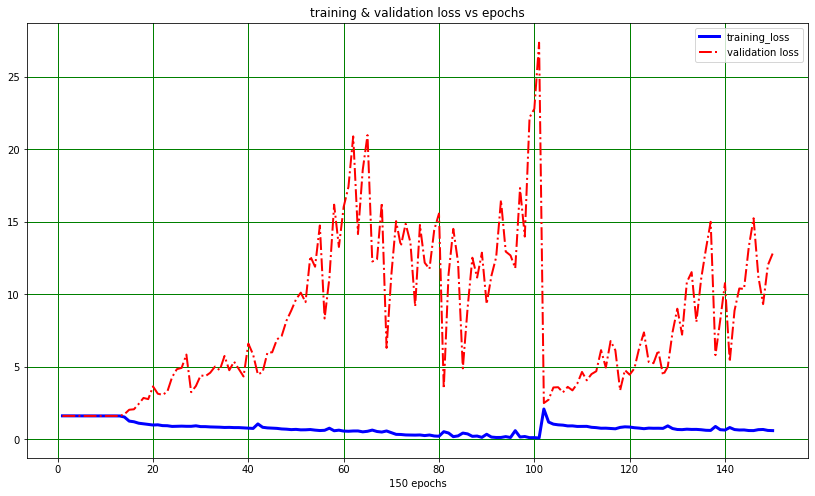

In [56]:
plt.figure(figsize=(14,8))
plt.plot(epochs_150, train_loss_150, color='blue', label='training_loss', linestyle='solid', linewidth=3)
plt.plot(epochs_150, val_loss_150, color='red', label='validation loss', linestyle='dashdot', linewidth=2)
plt.grid(color='green', linestyle='solid', linewidth=1)
plt.xlabel('150 epochs')
plt.title('training & validation loss vs epochs')
plt.legend()
plt.show()

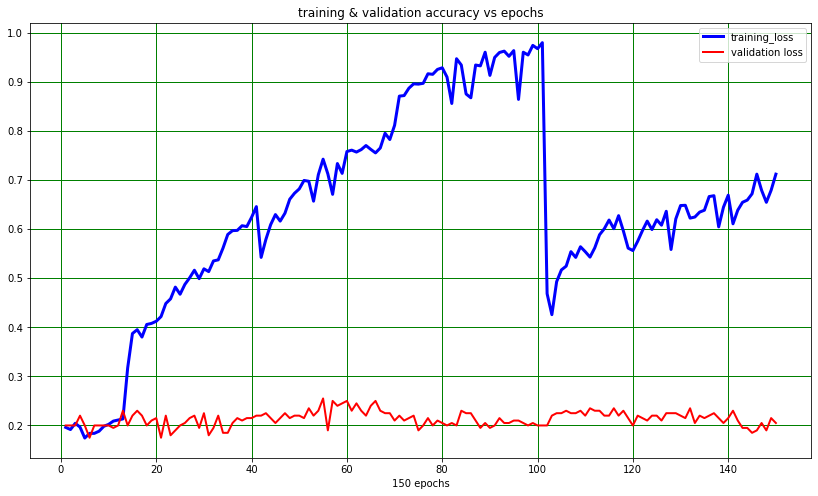

In [58]:
plt.figure(figsize=(14,8))
plt.plot(epochs_150, train_accuracy_150, color='blue', label='training_loss', linestyle='solid', linewidth=3)
plt.plot(epochs_150, val_accuracy_150, color='red', label='validation loss', linestyle='solid', linewidth=2)
plt.grid(color='green', linestyle='solid', linewidth=1)
plt.xlabel('150 epochs')
plt.title('training & validation accuracy vs epochs')
plt.legend()
plt.show()

In [59]:
cnn.load_weights('saved-model-81-3.49.hdf5')

In [63]:
results = cnn.evaluate(test_x, y_test, batch_size=8)
print("test loss, test acc:", results)

63/63 [==============================] - 9s 149ms/step - loss: 1.6778 - accuracy: 0.3600
test loss, test acc: [1.6777902841567993, 0.36000001430511475]


In [60]:
y_test_pred=cnn.predict(test_x)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [121]:
t=[test_x[492]]
t=np.array(t)

In [122]:
t.shape

(1, 432, 504, 3)

In [123]:
y_pred_0=cnn.predict(t)

In [124]:
y_pred_0

array([[0.09628861, 0.00542622, 0.05221105, 0.37388653, 0.47218758]],
      dtype=float32)

In [125]:
y_test.iloc[492]

0_Alahaiya_bilaval    0.0
0_Bhup                0.0
0_Malkauns            0.0
0_Yaman_kalyan        0.0
0_Miyan_malhar        1.0
Name: 492, dtype: float64